In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('credit_card_general.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [63]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [64]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

In [65]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(data)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

In [66]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

In [67]:
# Initialize cluster centroids randomly
k = 3
np.random.seed(42)
centroids = x_principal.sample(n=k)

for _ in range(1):
    # Calculate the distance between each data point and centroids
    distances = np.sqrt(((x_principal - centroids.iloc[0]) ** 2).sum(axis=1))
    for i in range(1, k):
        distances = np.column_stack((distances, np.sqrt(((x_principal - centroids.iloc[i]) ** 2).sum(axis=1))))

    # Assign each data point to the nearest centroid
    labels = np.argmin(distances, axis=1)

    # Update the centroids as the mean of the assigned data points
    new_centroids = pd.DataFrame(np.zeros_like(centroids))
    for i in range(k):
        new_centroids.iloc[i] = x_principal[labels == i].mean()

    centroids = new_centroids

# Add cluster labels to the DataFrame
x_principal['Cluster'] = labels

# Print the resulting DataFrame with cluster assignments
print(x_principal.head())

         P1        P2  Cluster
0 -0.489826 -0.679681        0
1 -0.518791  0.545002        1
2  0.330885  0.268961        1
3 -0.482373 -0.092081        0
4 -0.563289 -0.481920        0


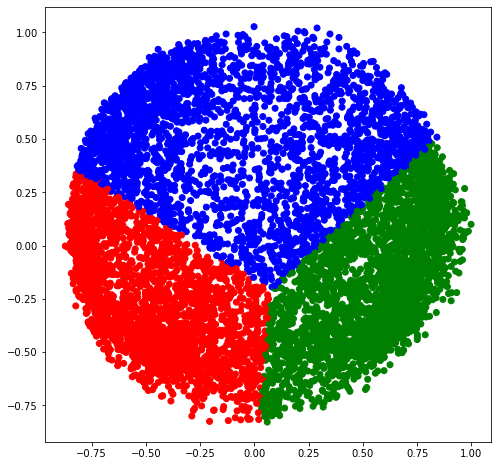

In [68]:
cluster_color = {0: 'red', 1: 'blue', 2: 'green'}
colors = [cluster_color[c] for c in x_principal['Cluster']]
plt.figure(figsize=(8, 8))
plt.scatter(x_principal['P1'], x_principal['P2'], c=colors)
plt.show()